In [116]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
import random

In [117]:
(X_train, y_train), (X_pred, y_pred) = mnist.load_data()

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state = 2020)

dim = 784
X_train = X_train.reshape(len(X_train), dim)
X_test = X_test.reshape(len(X_test), dim)

# уменьшение размерности
pca = PCA(svd_solver='full')
modelPCA = pca.fit(X_train)
X_train = modelPCA.transform(X_train)

# доля объясненной дисперсии
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_), 3)
print(explained_variance)

[0.098 0.168 0.23  0.284 0.333 0.375 0.408 0.437 0.464 0.488 0.509 0.53
 0.547 0.564 0.579 0.594 0.608 0.62  0.632 0.644 0.654 0.664 0.674 0.683
 0.692 0.7   0.708 0.716 0.724 0.731 0.737 0.744 0.75  0.756 0.761 0.767
 0.772 0.777 0.781 0.786 0.791 0.795 0.799 0.803 0.807 0.811 0.815 0.818
 0.821 0.825 0.828 0.831 0.834 0.837 0.84  0.842 0.845 0.848 0.85  0.853
 0.855 0.858 0.86  0.862 0.864 0.866 0.868 0.87  0.872 0.874 0.876 0.878
 0.879 0.881 0.883 0.885 0.886 0.888 0.889 0.891 0.892 0.893 0.895 0.896
 0.898 0.899 0.9   0.901 0.903 0.904 0.905 0.906 0.907 0.908 0.91  0.911
 0.912 0.913 0.914 0.915 0.916 0.917 0.918 0.918 0.919 0.92  0.921 0.922
 0.923 0.924 0.924 0.925 0.926 0.927 0.928 0.928 0.929 0.93  0.93  0.931
 0.932 0.933 0.933 0.934 0.935 0.935 0.936 0.937 0.937 0.938 0.938 0.939
 0.94  0.94  0.941 0.941 0.942 0.942 0.943 0.943 0.944 0.945 0.945 0.946
 0.946 0.946 0.947 0.947 0.948 0.948 0.949 0.949 0.95  0.95  0.951 0.951
 0.952 0.952 0.952 0.953 0.953 0.954 0.954 0.954 0.9

1. Определите, какое минимальное количество главных компонент необходимо использовать, чтобы доля объясненной дисперсии превышала 0.81. Построить график зависимости доли объясненной дисперсии от количества используемых ГК

Доля объясненной дисперсии: 0.81 
Минимальное количество ГК: 46


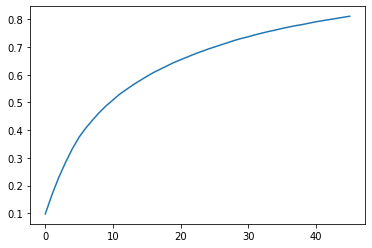

In [118]:
exp = 0.81

pca = PCA(n_components=exp, svd_solver='full')
X_train = X_train.reshape(len(X_train), dim)
modelPCA = pca.fit(X_train)

explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_), 3)
count = explained_variance.size

plt.plot(np.arange(count), explained_variance, ls='-')
print("Доля объясненной дисперсии: " + str(round(exp, 2)) + " \nМинимальное количество ГК: " + str(count))


2. Выведите количество верно классифицированных объектов класса 2 для тестовых данных

In [119]:
pca = PCA(n_components=count, svd_solver='full')
modelPCA = pca.fit(X_train) 

X_train = modelPCA.transform(X_train)

tree = RandomForestClassifier(criterion='gini', min_samples_leaf=10, max_depth=20, n_estimators=10, random_state = 2020)
clf = OneVsRestClassifier(tree).fit(X_train, y_train)

# применим полученное раннее преобразование к тестовым данным
modelPCA = pca.fit(X_test) 
X_test_transf = modelPCA.transform(X_test)

y_pred = clf.predict(X_test_transf)

m_conf = confusion_matrix(y_test, y_pred)
print(m_conf)
print("Количество верно классифицированных изображений: " + str(
    m_conf[2][2]))

[[1376    0  100   59    2   50   42   24   37    3]
 [   0 1836   32   10    8    8   50  121    8    2]
 [  63   11  867   77   68   81  434   11  136   15]
 [  23    6   65 1493   17  103   10   19  106   31]
 [  13   12   87    7 1325   17   50   39   68  138]
 [  91    9  175  213   55  699   11   38  267   33]
 [  40   24  727   29   41   32  684   23  135   31]
 [  55   57   22   18   59   34  167 1282   32  160]
 [  46   46  134  286   64  433   43   28  589  104]
 [  21   15   39   63  349   43   34  148  214  898]]
Количество верно классифицированных изображений: 867


3. Введите вероятность отнесения 5 любых изображений из тестового набора к назначенному классу

Predicted class: 0
True class: 6
Вероятность изображения No.9135 принадлежать к классу 0 -> 0.546
Predicted class: 6
True class: 2
Вероятность изображения No.5226 принадлежать к классу 6 -> 0.485
Predicted class: 8
True class: 5
Вероятность изображения No.7214 принадлежать к классу 8 -> 0.582
Predicted class: 5
True class: 5
Вероятность изображения No.9592 принадлежать к классу 5 -> 0.255
Predicted class: 8
True class: 7
Вероятность изображения No.1851 принадлежать к классу 8 -> 0.261


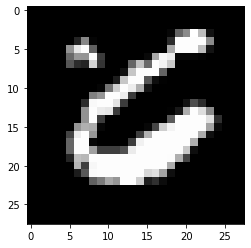

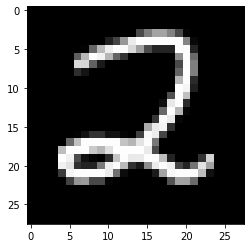

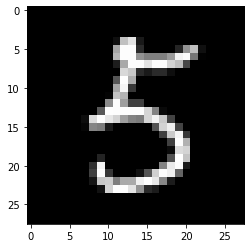

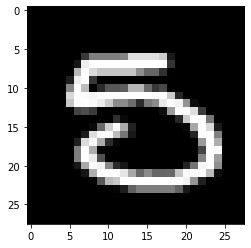

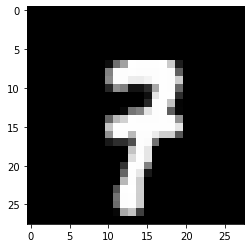

In [120]:
for i in range(5):
    num = random.randint(0, 9999)
    obj = X_test[num].reshape(28, 28)
    plt.figure()
    plt.imshow(obj, cmap="gray")
    result = clf.predict_proba(X_test_transf)[num][y_pred[num]]
    print(f"Predicted class: {y_pred[num]}")
    print(f"True class: {y_test[num]}")
    print("Вероятность изображения No." + str(num) + " принадлежать к классу " + str(y_pred[num]) + " -> " + str(
        round(result, 3)))

4.	Определите Accuracy, Precision, Recall и F1 для обученной модели

In [121]:
targets = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']

print("Accuracy: " + str(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred, target_names=targets))

Accuracy: 0.6138333333333333
              precision    recall  f1-score   support

     Class 0       0.80      0.81      0.80      1693
     Class 1       0.91      0.88      0.90      2075
     Class 2       0.39      0.49      0.43      1763
     Class 3       0.66      0.80      0.72      1873
     Class 4       0.67      0.75      0.71      1756
     Class 5       0.47      0.44      0.45      1591
     Class 6       0.45      0.39      0.42      1766
     Class 7       0.74      0.68      0.71      1886
     Class 8       0.37      0.33      0.35      1773
     Class 9       0.63      0.49      0.55      1824

    accuracy                           0.61     18000
   macro avg       0.61      0.61      0.60     18000
weighted avg       0.62      0.61      0.61     18000

